In [1]:
import numpy as np

from astropy.table import QTable

import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/')
from dark_matter_mass_v1_2_plottingFunctions import plot_fitted_rot_curve

## Galaxies to plot

In [11]:
RUN_ALL_GALAXIES = False

FILE_IDS = ['8315-3702']

IMAGE_DIR = '../images/'

## Create fitted rotation curve plots

[1917.51721871] km / s -17.26775360107422


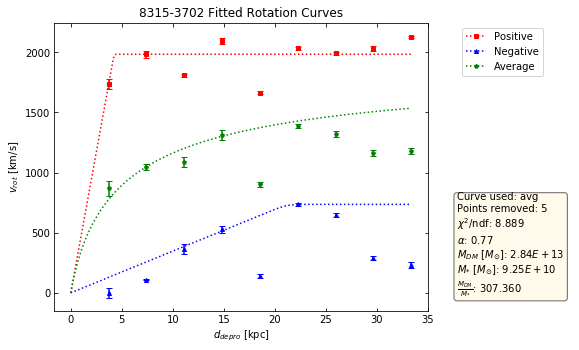

In [12]:
###############################################################################
# Read in the 'master_file'
#------------------------------------------------------------------------------
master_table = QTable.read( '../master_file_vflag_10.txt', format='ascii.ecsv')
#------------------------------------------------------------------------------


if RUN_ALL_GALAXIES:
    for i in range(len(master_table)):
        
        #######################################################################
        # Construct galaxy ID
        #----------------------------------------------------------------------
        gal_ID = str(master_table['MaNGA_plate'][i]) + '-' + str(master_table['MaNGA_fiberID'][i])
        #----------------------------------------------------------------------
        
        
        #######################################################################
        # Plot fitted rotation curve
        #----------------------------------------------------------------------
        plot_fitted_rot_curve( gal_ID, master_table[i], IMAGE_DIR=IMAGE_DIR)
        #----------------------------------------------------------------------
        
else:
    for i in range(len(FILE_IDS)):
        
        #######################################################################
        # Find galaxy in master_table
        #----------------------------------------------------------------------
        plate, fiber = FILE_IDS[i].split('-')
        
        plate_boolean = master_table['MaNGA_plate'] == int(plate)
        fiber_boolean = master_table['MaNGA_fiberID'] == int(fiber)
        
        row = master_table[plate_boolean & fiber_boolean]
        
        print(row['avg_v_max'], row['rabsmag'][0])
        #----------------------------------------------------------------------
        
        
        #######################################################################
        # Plot fitted rotation curve
        #----------------------------------------------------------------------
        plot_fitted_rot_curve( FILE_IDS[i], row[0])
        #----------------------------------------------------------------------